# Vizualize And Analyze the Data 
You have to pick a metric and provide a string for saving the files.

Notebook loads the dataframes and focuses on vizualization of means.

In [1]:
import os
os.chdir('./data')

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

import pandas as pd
import seaborn as sns
from glob import glob

matplotlib.rcParams.update({'font.size': 15})

### Pick Metric
NSS, SIM, IG, AUC

## SIM

In [3]:
plot_metric = 'SIM'

In [4]:
df = pd.read_csv('scores_' + plot_metric + '.csv')
df_feaces = pd.read_csv('scores_faces_' + plot_metric + '.csv')
df_f03 = pd.read_csv('scores_f03_' + plot_metric + '.csv')
df_f05 = pd.read_csv('scores_f05_' + plot_metric + '.csv')
df_f07 = pd.read_csv('scores_f07_' + plot_metric + '.csv')
mean_models = pd.read_csv('scores_mean_models_' + plot_metric + '.csv')
mean_contexts = pd.read_csv('scores_mean_contexts_' + plot_metric + '.csv')

In [5]:
df

,models,all,person,no person,animal,electronic,sports,mean context
0,aim,0.529256,0.504981,0.568607,0.472232,0.535764,0.478441,0.514880
1,cas,0.521473,0.496486,0.561978,0.459220,0.525020,0.490274,0.509075
2,covsal,0.528376,0.520976,0.540371,0.516241,0.507251,0.502744,0.519326
3,gbvs,0.579692,0.547139,0.632463,0.532250,0.586402,0.524310,0.567043
4,icf,0.540450,0.520813,0.572283,0.480500,0.534348,0.493894,0.523715
5,ik,0.483443,0.458229,0.524316,0.440349,0.498116,0.439303,0.473959
6,sun,0.436436,0.400730,0.494317,0.374971,0.449312,0.347440,0.417201
7,dg,0.642767,0.630332,0.662924,0.623571,0.637034,0.623714,0.636724
8,mean model,0.532737,0.509961,0.569657,0.487417,0.534156,0.487515,0.520240


## NSS

In [6]:
plot_metric = 'NSS'

In [7]:
df = pd.read_csv('scores_' + plot_metric + '.csv')
df_faces = pd.read_csv('scores_faces_' + plot_metric + '.csv')
df_f03 = pd.read_csv('scores_f03_' + plot_metric + '.csv')
df_f05 = pd.read_csv('scores_f05_' + plot_metric + '.csv')
df_f07 = pd.read_csv('scores_f07_' + plot_metric + '.csv')
mean_models = pd.read_csv('scores_mean_models_' + plot_metric + '.csv')
mean_contexts = pd.read_csv('scores_mean_contexts_' + plot_metric + '.csv')

In [8]:
mean_contexts

,Unnamed: 0,0.0,0.3,0.5,0.7
0,aim,0.700463,0.728636,0.750676,0.761014
1,cas,0.697208,0.718745,0.741420,0.759430
2,covsal,0.810962,0.843136,0.867493,0.878562
3,gbvs,0.936770,0.956026,0.971219,0.978307
4,icf,0.738762,0.762025,0.776800,0.782087
5,ik,0.623667,0.654673,0.678249,0.691531
6,sun,0.350892,0.389937,0.425804,0.453816


#### Reset Indicies

In [9]:
mean_contexts.rename(columns={'Unnamed: 0':'models'}, inplace=True)
mean_contexts.set_index('models', inplace=True)
mean_models.set_index('context', inplace=True)

In [10]:
mean_contexts

,0.0,0.3,0.5,0.7
models,,,,
aim,0.700463,0.728636,0.750676,0.761014
cas,0.697208,0.718745,0.741420,0.759430
covsal,0.810962,0.843136,0.867493,0.878562
gbvs,0.936770,0.956026,0.971219,0.978307
icf,0.738762,0.762025,0.776800,0.782087
ik,0.623667,0.654673,0.678249,0.691531
sun,0.350892,0.389937,0.425804,0.453816


## Visualization

In [1]:
matplotlib.rcParams.update({'font.size': 20})

f, ax = plt.subplots(figsize=(11, 9))
matplotlib.rcParams.update({'font.size': 20})

sns.heatmap(mean_models, annot=True, linewidths=.5, ax=ax,fmt='.3f', cmap='BuGn');
plt.ylabel('Weight of face influence')
plt.title('{} scores of different context'.format(plot_metric));

NameError: name 'matplotlib' is not defined

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text xticklabel objects>)

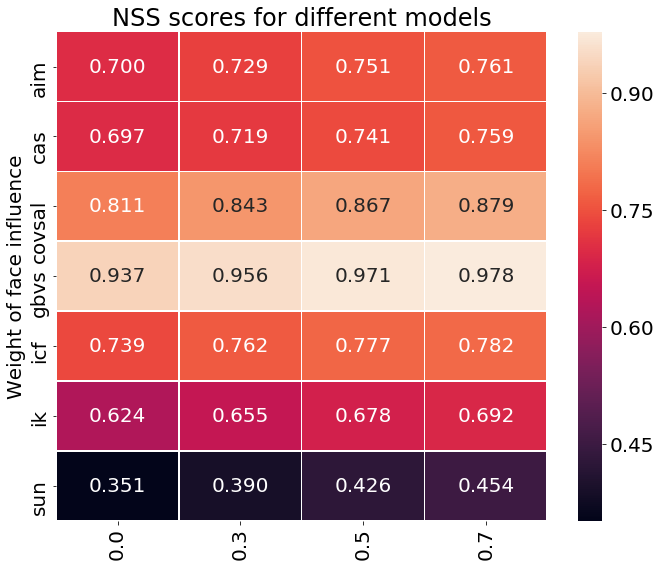

In [18]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(mean_contexts, annot=True, linewidths=.5, ax=ax,fmt='.3f');
plt.ylabel('Weight of face influence')
plt.title('{} scores for different models'.format(plot_metric));
plt.xticks(rotation=90)


Text(240.0, 0.5, '$\\alpha$ face weight')

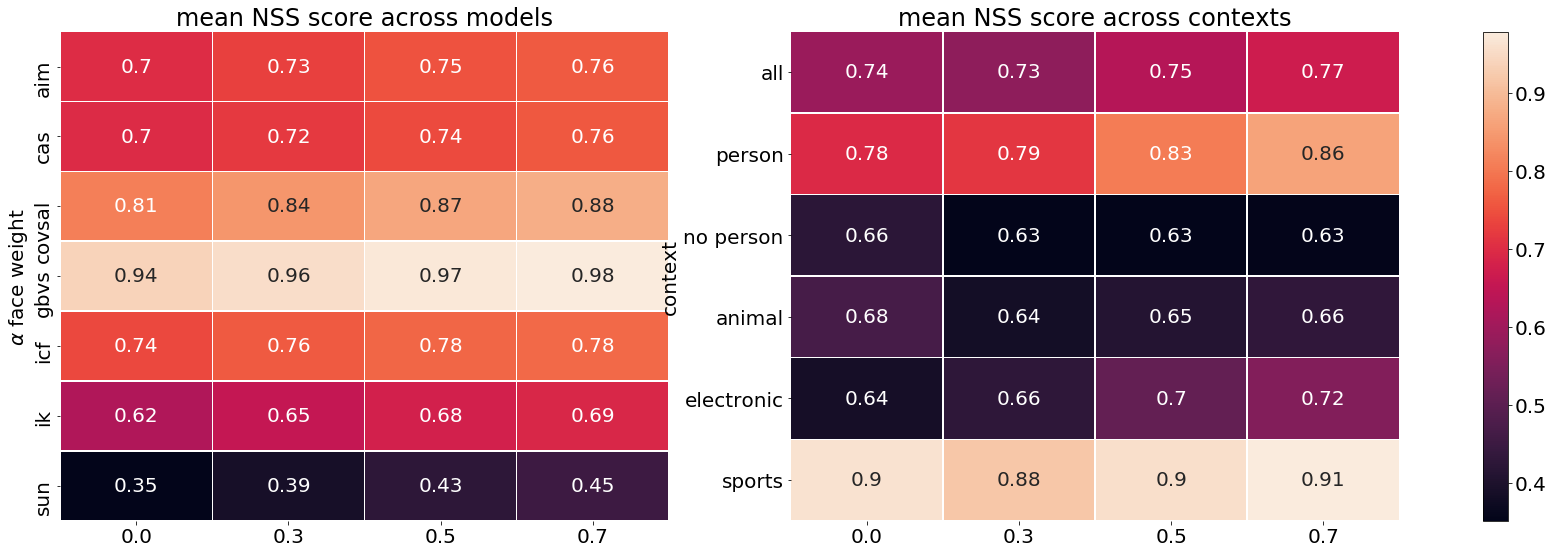

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(30,9), sharex=False, sharey=False)

im = sns.heatmap(mean_contexts, annot=True, linewidths=.5, ax=ax[0], cbar=False, cmap='BuGn');
sns.heatmap(mean_models, annot=True, linewidths=.5, ax=ax[1], cbar=False, cmap='BuGn');

mappable = im.get_children()[0]
plt.colorbar(mappable, ax = ax);

ax[0].set_title('mean NSS score across models'.format(plot_metric))
ax[1].set_title('mean NSS score across contexts'.format(plot_metric))

ax[0].set_ylabel(r'$\alpha$ face weight')


In [27]:
from tabulate import tabulate
print(tabulate(mean_contexts, tablefmt="pipe", headers="keys"))
print()
print(tabulate(mean_models, tablefmt="pipe", headers="keys"))

| models   |      0.0 |      0.3 |      0.5 |      0.7 |
|:---------|---------:|---------:|---------:|---------:|
| aim      | 0.700463 | 0.728636 | 0.750676 | 0.761014 |
| cas      | 0.697208 | 0.718745 | 0.74142  | 0.75943  |
| covsal   | 0.810962 | 0.843136 | 0.867493 | 0.878562 |
| gbvs     | 0.93677  | 0.956026 | 0.971219 | 0.978307 |
| icf      | 0.738762 | 0.762025 | 0.7768   | 0.782087 |
| ik       | 0.623667 | 0.654673 | 0.678249 | 0.691531 |
| sun      | 0.350892 | 0.389937 | 0.425804 | 0.453816 |

| context    |      0.0 |      0.3 |      0.5 |      0.7 |
|:-----------|---------:|---------:|---------:|---------:|
| all        | 0.735362 | 0.728069 | 0.753863 | 0.769762 |
| person     | 0.782783 | 0.790905 | 0.832052 | 0.857653 |
| no person  | 0.65849  | 0.626122 | 0.627114 | 0.627286 |
| animal     | 0.679078 | 0.641684 | 0.653673 | 0.661891 |
| electronic | 0.642371 | 0.661047 | 0.698956 | 0.719648 |
| sports     | 0.903448 | 0.883468 | 0.901479 | 0.910687 |
